<a href="https://www.kaggle.com/code/mounirelhady/car-price-prediction-dv?scriptVersionId=154845373" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction1/car_price_prediction.csv


Import libraries 

In [2]:
import numpy as np 
import openpyxl
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

Import dataset 

In [3]:
car_df = pd.read_csv('/kaggle/input/car-price-prediction1/car_price_prediction.csv')
car_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# Data Cleaning

DataFrame.drop() method is used to remove the columns from the DataFrame, by default it doesn’t remove on the existing DataFrame instead it returns a new DataFrame after dropping the columns specified with the drop method.

In [4]:
car_df=car_df.drop(['ID','Doors'],axis=1)
car_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


**We can determine the age of the car through this column prod year using these steps and drop this column prod year**

In [5]:
import datetime
dtime=datetime.datetime.now()
car_df['Age']=dtime.year-car_df['Prod. year']

In [6]:
car_df=car_df.drop(['Prod. year'],axis=1)
car_df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,9


**In this column Mileage, it is converted to numeric  data because it contains km, so km is deleted from the data by using replace**

In [7]:
car_df["Mileage"]=car_df["Mileage"].str.replace('km','')
car_df.head(10)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,9
5,39493,891,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2,160931,4.0,Automatic,Front,Left wheel,White,4,7
6,1803,761,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,Left wheel,White,12,13
7,549,751,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,Left wheel,Grey,12,10
8,1098,394,TOYOTA,Camry,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,Left wheel,Black,12,9
9,26657,-,LEXUS,RX 350,Jeep,Yes,Petrol,3.5,128500,6.0,Automatic,4x4,Left wheel,Silver,12,16


**In this column Engine volume, there is more than one data type. We want to convert from text to numeric data by using delete this word Turbo   **

In [8]:
car_df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [9]:
car_df['Engine volume']=car_df['Engine volume'].str.replace('Turbo','')
car_df['Engine volume']=car_df['Engine volume'].astype(float)
car_df['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 19237, dtype: float64

**In this step,we can detect outliers from the data because its cause damage to the data. Through this code, they are deleted so as not to cause noise to the data.**

In [10]:
car_df_numeric=car_df.select_dtypes(exclude='object')
for col in car_df_numeric:
    q1=car_df[col].quantile(0.25)
    q3=car_df[col].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    outlier=((car_df_numeric[col]>high)|(car_df_numeric[col]<low)).sum()
    total=car_df_numeric[col].shape[0]
    print(f"Total Outliers in {col} are :{outlier}-{round(100*(outlier)/total,2)}%")
    if outlier >0:
        car_df=car_df.loc[(car_df[col]<=high) & (car_df[col]>=low)]
        

Total Outliers in Price are :1073-5.58%
Total Outliers in Engine volume are :1381-7.18%
Total Outliers in Cylinders are :4870-25.32%
Total Outliers in Airbags are :0-0.0%
Total Outliers in Age are :1811-9.41%


**In this step, all data is transformed into numeric data to be used correctly in extracting outliers. This conversion is done through a library sklearn.preprocessing using a LabelEncoder and saved in la to be used through la.**

In [11]:
dobject=car_df.select_dtypes(include='object')
dnumeric=car_df.select_dtypes(exclude='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

In [13]:
for i in range(0,dobject.shape[1]):
    dobject.iloc[:,i]=la.fit_transform(dobject.iloc[:,i])

In [14]:
car_df=pd.concat([dobject,dnumeric],axis=1)
car_df

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Wheel,Color,Price,Engine volume,Cylinders,Airbags,Age
2,0,16,347,3,0,4,2495,3,1,1,1,8467,1.3,4.0,2,17
3,293,12,334,4,1,2,1955,0,0,0,14,3607,2.5,4.0,0,12
4,170,16,347,3,1,4,5683,0,1,0,12,11726,1.3,4.0,4,9
5,306,17,683,4,1,1,1779,0,1,0,14,39493,2.0,4.0,4,7
6,266,43,616,3,1,2,3048,0,1,0,14,1803,1.8,4.0,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,230,43,616,3,1,2,3366,0,1,0,12,470,1.8,4.0,12,12
19233,287,17,697,8,1,4,1796,2,1,0,11,15681,2.4,4.0,8,12
19234,291,17,770,4,1,1,533,0,1,0,7,26108,2.0,4.0,4,13
19235,60,6,213,4,1,1,4227,0,1,0,1,5331,2.0,4.0,4,16


**now can detect outliers from all column**

In [15]:
#car_df_numeric=car_df.select_dtypes(exclude='object')
for col in car_df:
    q1=car_df[col].quantile(0.25)
    q3=car_df[col].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    outlier=((car_df[col]>high)|(car_df[col]<low)).sum()
    total=car_df[col].shape[0]
    print(f"Total Outliers in {col} are :{outlier}-{round(100*(outlier)/total,2)}%")
    if outlier >0:
        car_df=car_df.loc[(car_df[col]<=high) & (car_df[col]>=low)]
        

Total Outliers in Levy are :0-0.0%
Total Outliers in Manufacturer are :0-0.0%
Total Outliers in Model are :0-0.0%
Total Outliers in Category are :0-0.0%
Total Outliers in Leather interior are :0-0.0%
Total Outliers in Fuel type are :0-0.0%
Total Outliers in Mileage are :0-0.0%
Total Outliers in Gear box type are :2935-23.61%
Total Outliers in Drive wheels are :918-9.67%
Total Outliers in Wheel are :510-5.94%
Total Outliers in Color are :0-0.0%
Total Outliers in Price are :0-0.0%
Total Outliers in Engine volume are :25-0.31%
Total Outliers in Cylinders are :0-0.0%
Total Outliers in Airbags are :0-0.0%
Total Outliers in Age are :27-0.34%


To eliminate blank spaces ::

In [16]:
car_df["Levy"]=car_df["Levy"].replace('-',0)
car_df.head(20)

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Wheel,Color,Price,Engine volume,Cylinders,Airbags,Age
4,170,16,347,3,1,4,5683,0,1,0,12,11726,1.3,4.0,4,9
5,306,17,683,4,1,1,1779,0,1,0,14,39493,2.0,4.0,4,7
6,266,43,616,3,1,2,3048,0,1,0,14,1803,1.8,4.0,12,13
7,263,17,697,8,1,4,2683,0,1,0,7,549,2.4,4.0,12,10
8,155,43,194,8,1,2,3789,0,1,0,1,1098,2.5,4.0,12,9
15,20,43,167,4,1,4,5127,0,1,0,14,549,2.0,4.0,12,5
16,282,17,313,8,1,4,703,0,1,0,2,7683,1.8,4.0,12,7
17,282,17,313,8,1,4,4375,0,1,0,14,28382,1.8,4.0,4,7
20,197,17,313,8,1,4,412,0,1,0,12,18826,1.6,4.0,4,11
21,210,43,616,8,1,5,2294,0,1,0,14,20698,1.8,4.0,12,11


-Import liberaries to do scaling


In [17]:
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

-Scalling :: is changing of the range of data

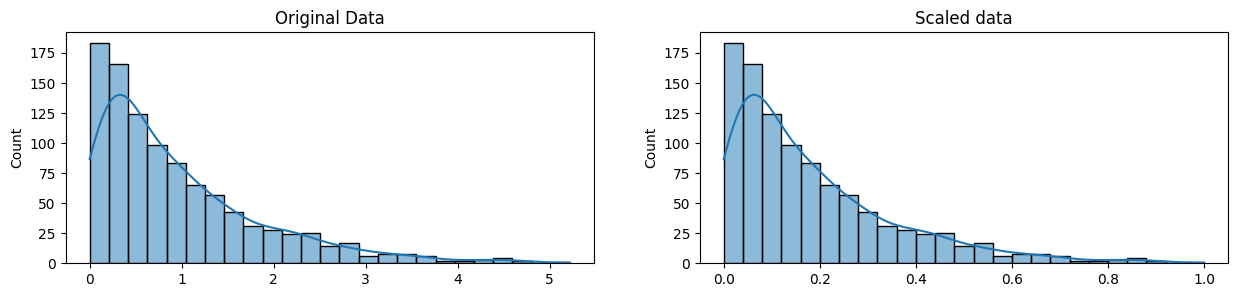

In [18]:
original_data = np.random.exponential(size=1000)
scaled_data = minmax_scaling(original_data, columns=[0])
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

Normimalization :: is changing the shape of distribution of data.

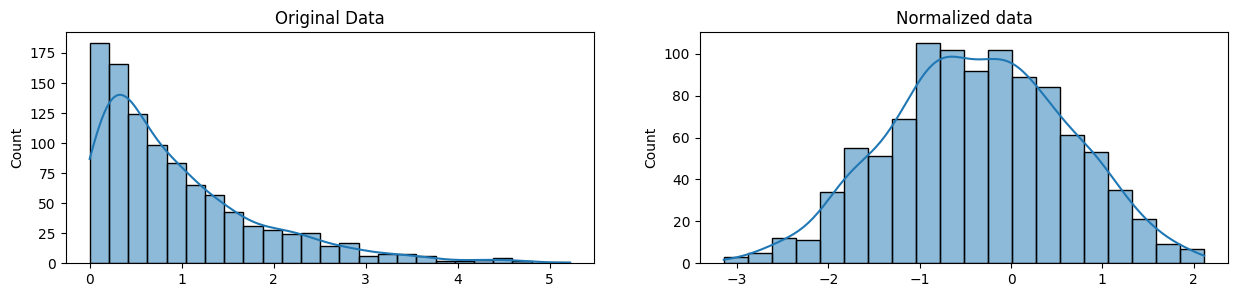

In [19]:
normalized_data = stats.boxcox(original_data)
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()